### Лабораторная работа №3: Классификация kNN 
##### Выполнил студент группы: 6131-010402D Павлов Владислав

### 1. Загрузка датасета 

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

import seaborn as sns

from matplotlib import pyplot as plt


df = pd.read_csv("dataset/mushroom_cleaned.csv")

# 2. Бинарная классификация

### 2.1 Описание датасета (бинарная классификация )

#### Датасет содержит данные о съедобных и ядовитых грибах
#### Цель - определить ядовитый гриб или нет

| Признак | Описание | Единицы измерения |
|:-------:|:--------:|:-----------------:|
| Cap Diameter | Диаметр шляпки | cm |
| Cap Shape | Форма шляпки | numerical |
| Gill Attachment | Крепление жабр | numerical |
| Gill Color | Цвет жабр | numerical |
| Stem Height | Высота стебля | cm |
| Stem Width | Ширина стебля | mm | 
| Stem Color | Цвет стебля | numerical |
| Season | Сезон | numerical |
| Target Class | Целевой класс | 0,1 |

##### Целевой класс содержит два значения - 0 или 1, где 0 относится к съедобным, а 1 - к ядовитым. 



In [2]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [3]:
print(df)

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.80427

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


### 2.2 Проверка на наличие "null"

In [5]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

### 2.3 В данном DataFrame отсутствуют категориальные признаки, нет необхомости в кодировки

### 2.4 Выбор значения гиперпараметра k алгоритма kNN

In [6]:
k = 5

### 2.5 Разделение выборки на обучающую и тестовую 

In [7]:
X = df.drop("class", axis=1)
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

### 2.6 Бинарная классификация

In [8]:
neighboor = KNeighborsClassifier(n_neighbors = k)
neighboor.fit(x_train, y_train)
neighboor_predict = neighboor.predict(x_test)

### 2.7 Метрики: accuracy, precision, recall, f-measure & classification report


In [9]:
neighboor_acc = accuracy_score(y_test,neighboor_predict)
neighboor_prec = precision_score(y_test, neighboor_predict)
neighboor_rec = recall_score(y_test, neighboor_predict)
neighboor_f1= f1_score(y_test, neighboor_predict)
neighboor_class_report = classification_report(y_test, neighboor_predict)

print(f"Accuracy = {neighboor_acc}; Precision = {neighboor_prec}; Recall = {neighboor_rec}; F1-score = {neighboor_f1}")
print(f"Classification Report: \n {neighboor_class_report}")

Accuracy = 0.7072975140336808; Precision = 0.7314221472737493; Recall = 0.734145791017829; F1-score = 0.7327814383060202
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.67      0.68      7349
           1       0.73      0.73      0.73      8862

    accuracy                           0.71     16211
   macro avg       0.70      0.70      0.70     16211
weighted avg       0.71      0.71      0.71     16211



### 2.8 Нормализация данных 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_pd = pd.DataFrame(X_scaled, columns= X.columns)

x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(X_scaled_pd, y, test_size= 0.3, random_state= 42)


### 2.9 Бинарная классификация после нормализации данных

In [11]:
neighboor_scaled = KNeighborsClassifier(n_neighbors = k)
neighboor_scaled.fit(x_train_scaled, y_train)
neighboor_predict_scaled = neighboor_scaled.predict(x_test_scaled)

### 2.10 Метрики после нормализации данных

In [12]:
neighboor_acc_scaled = accuracy_score(y_test,neighboor_predict_scaled)
neighboor_prec_scaled = precision_score(y_test, neighboor_predict_scaled)
neighboor_rec_scaled = recall_score(y_test, neighboor_predict_scaled)
neighboor_f1_scaled = f1_score(y_test, neighboor_predict_scaled)
neighboor_class_report_scaled = classification_report(y_test, neighboor_predict_scaled)

print(f"Accuracy = {neighboor_acc_scaled}; Precision = {neighboor_prec_scaled}; Recall = {neighboor_rec_scaled}; F1-score = {neighboor_f1_scaled}")
print(f"Classification Report: \n {neighboor_class_report_scaled}")

Accuracy = 0.9885263092961569; Precision = 0.9874157303370786; Recall = 0.9916497404649064; F1-score = 0.9895282062830763
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



### 2.11 После нормализации данных все метрики улучшились

### 2.12 Корреляционная матрица. Выбор наиболее важных признаков

<Axes: >

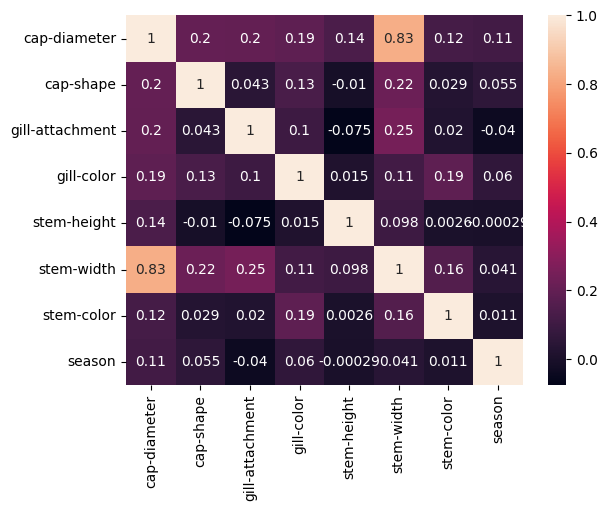

In [13]:
x_corr_matrix = X_scaled_pd.corr()
sns.heatmap(x_corr_matrix, annot = True)

In [14]:
for i in range(len(x_corr_matrix)):
    x_corr_matrix.iloc[i:i] = 0

threshold = 0.4

fitered_matrix = x_corr_matrix.abs() > threshold

feature_matrix = fitered_matrix.sum()

important_features = feature_matrix.sort_values(ascending= False)

print(f"Наиболее важные признаки:\n {important_features}")

Наиболее важные признаки:
 cap-diameter       2
stem-width         2
cap-shape          1
gill-attachment    1
gill-color         1
stem-height        1
stem-color         1
season             1
dtype: int64


##### Наиболее важными признаками оказались "Cap Diameter" & "Stem Width", также важность этих признаков показано на корреляционной матрице

### 2.13 Бинарная классификация с отфильтрованными признаками

In [15]:
selected_features = ["cap-diameter", "stem-width"]

x_train_filtered = x_train_scaled[selected_features]
x_test_fitered = x_test_scaled[selected_features]

neighboor_corr_filtered = KNeighborsClassifier(n_neighbors = k, metric= "euclidean")
neighboor_corr_filtered.fit(x_train_filtered, y_train)
neighboor_predict_filtered = neighboor_corr_filtered.predict(x_test_fitered)

### 2.14 Метрики с отфильтрованными признаками

In [16]:
neighboor_acc_filtered = accuracy_score(y_test,neighboor_predict_filtered)
neighboor_prec_filtered = precision_score(y_test, neighboor_predict_filtered)
neighboor_rec_filtered = recall_score(y_test, neighboor_predict_filtered)
neighboor_f1_filtered = f1_score(y_test, neighboor_predict_filtered)
neighboor_class_report_filtered = classification_report(y_test, neighboor_predict_filtered)

print(f"Accuracy = {neighboor_acc_filtered}; Precision = {neighboor_prec_filtered}; Recall = {neighboor_rec_filtered}; F1-score = {neighboor_f1_filtered}")
print(f"Classification Report: \n {neighboor_class_report_filtered}")

Accuracy = 0.651101104188514; Precision = 0.6774800708591674; Recall = 0.6904761904761905; F1-score = 0.6839163965575054
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      7349
           1       0.68      0.69      0.68      8862

    accuracy                           0.65     16211
   macro avg       0.65      0.65      0.65     16211
weighted avg       0.65      0.65      0.65     16211



### 2.15 Сравнение результатов "До" и "После" фильтрации, сделать выводы

#### Метрики стали хуже. Если бы датасе был перегружен, то такой метод логичен, но в данном случае, результат ухудшился

### 2.16 Перебор значений гиперпараметров k в диапазоне с использованием кросс-валидации 

In [17]:
from joblib import Parallel, delayed
train_score = []
test_score = []
crossval_score = []

for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(model, X_scaled_pd, y, cv = 10, n_jobs= -1)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores.mean()}")
    crossval_score.append(scores.mean())
    model.fit(x_train_scaled, y_train)
    pred_train = model.predict(x_train_scaled)
    pred_test = model.predict(x_test_scaled)
    train_score.append(accuracy_score(y_train, pred_train))
    test_score.append(accuracy_score(y_test, pred_test))




Neighbors: 1, folds count: 10 avg score: 0.5763506936752657
Neighbors: 2, folds count: 10 avg score: 0.5845497840728614
Neighbors: 3, folds count: 10 avg score: 0.5842909461845978
Neighbors: 4, folds count: 10 avg score: 0.5870118212967466
Neighbors: 5, folds count: 10 avg score: 0.5843281715766923
Neighbors: 6, folds count: 10 avg score: 0.5864014056943718
Neighbors: 7, folds count: 10 avg score: 0.5861421739409789
Neighbors: 8, folds count: 10 avg score: 0.5872342626221445
Neighbors: 9, folds count: 10 avg score: 0.5843101394035963
Neighbors: 10, folds count: 10 avg score: 0.5853652732608869
Neighbors: 11, folds count: 10 avg score: 0.5837181464145327
Neighbors: 12, folds count: 10 avg score: 0.5860502526696179
Neighbors: 13, folds count: 10 avg score: 0.584477138218439
Neighbors: 14, folds count: 10 avg score: 0.5855507357880105
Neighbors: 15, folds count: 10 avg score: 0.5837000525929821
Neighbors: 16, folds count: 10 avg score: 0.5851436847391167
Neighbors: 17, folds count: 10 avg

### 2.17 График train/test accuracy в зависимости от значения с отфильтрованными признаками

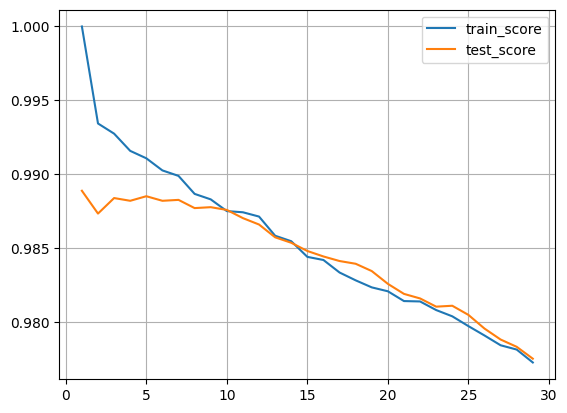

In [18]:
plt.plot(range(1,30), train_score, label = 'train_score')
plt.plot(range(1,30), test_score, label = 'test_score')
plt.legend()
plt.grid()

### 3. Многоклассовая классификация

In [19]:
df_star = pd.read_csv("dataset/star_classification.csv")

### 3.1 Описание датасета (многоклассовая классификация )

#### Датасет содержит данные о звездах
#### Цель - классифицировать является звезда галактикой/квазаром или другим видом

| Признак | Описание | Тип данных |
|:-------:|:--------:|:-----------------:|
| obj_ID | Идентификатор объекта | numerical |
| alpha | Прямой угол схождения | numerical |
| u | Ультрафиолетовый фильтр | numerical |
| g | Зеленый фильтр | numerical |
| r | Красный фильтр | numerical |
| i | Фильтр ближнего инфракрасного диапазона в фотометрической системе | numerical | 
| z | Инфракрасный фильтр | numerical |
| run_ID | Номер запуска, используемый для идентификации конкретного сканирования | numerical |
| rerun_ID | Номер повторного запуска, указывающий способ обработки изображения | numerical |
| cam_coi | Столбец камеры для идентификации линии сканирования в рамках выполнения | numerical | 
| field_ID | Номер поля для идентификации каждого поля  | numerical |
| spec_obj_ID | Уникальный идентификатор, используемый для оптических спектроскопических объектов | numerical |
| class | класс объекта | categorical |
| redshift | значение красного смещения, основанное на увеличении длины волны | numerical |
| plate | идентификатор пластины, идентифицирует каждую пластину в SDSS | numerical |
| MJD | Измененная юлианская дата, используемая для указания того, когда был получен данный фрагмент данных SDSS. | numerical |
| fiber_ID | идентификатор волокна, который идентифицирует волокно, направлявшее свет в фокальную плоскость при каждом наблюдении. | numerical | 

##### Целевой класс содержит несколько значений "Galaxy", "QSO", "STAR"



In [20]:
df_star.head() 

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [21]:
df_star_values = df_star["class"].unique()
print(df_star_values)

['GALAXY' 'QSO' 'STAR']


In [22]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### 3.2 Осуществить предобработку данных

In [23]:
col_drop = ["run_ID", "rerun_ID", "field_ID", "spec_obj_ID"]

df_star_droped = df_star.drop(columns = col_drop, axis = 1)

### 3.3 Кодирование данных

In [24]:
df_star_droped["class"] = df_star["class"].replace({'GALAXY': 0, 'QSO': 1, 'STAR': 2  }) 

C:\Temp\ipykernel_6672\1740966883.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_star_droped["class"] = df_star["class"].replace({'GALAXY': 0, 'QSO': 1, 'STAR': 2  })


In [25]:
x1 = df_star_droped.drop("class", axis = 1)
y1 = df_star_droped["class"]

### 3.4 Нормализация данных

In [26]:
star_scaler = StandardScaler()
x_star_scaller = star_scaler.fit_transform(x1)
x_star_scaller_pd = pd.DataFrame(x_star_scaller, columns= x1.columns)

### 3.5 Выбор гиперпараметра k алгоритма kNN

In [27]:
k = 5

### 3.6 Разделение выборки на обучающую и тестовую

In [28]:
x_star_train, x_star_test, y_star_train, y_star_test = train_test_split(x_star_scaller_pd, y1, test_size=0.4, random_state= 42)

### 3.7 Многоклассовая классификация 

In [29]:
model_star = KNeighborsClassifier(n_neighbors=k)
model_star.fit(x_star_train, y_star_train)
model_star_pred = model_star.predict(x_star_test)

### 3.8 Метрики

In [30]:
model_star_acc = accuracy_score(y_star_test,model_star_pred)
model_star_prec = precision_score(y_star_test, model_star_pred, average = "micro")
model_star_rec = recall_score(y_star_test, model_star_pred, average = "micro")
model_star_f1 = f1_score(y_star_test, model_star_pred, average = "micro")
model_star_report = classification_report(y_star_test, model_star_pred)

print(f"Accuracy = {model_star_acc}; Precision = {model_star_prec}; Recall = {model_star_rec}; F1-score = {model_star_f1}")
print(f"Classification Report: \n {model_star_report}")

Accuracy = 0.9026; Precision = 0.9026; Recall = 0.9026; F1-score = 0.9026
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     23733
           1       0.96      0.82      0.89      7626
           2       0.91      0.81      0.86      8641

    accuracy                           0.90     40000
   macro avg       0.92      0.86      0.89     40000
weighted avg       0.91      0.90      0.90     40000



### 3.9 Корреляционная матрица. Выбор наиболее важных признаков

<Axes: >

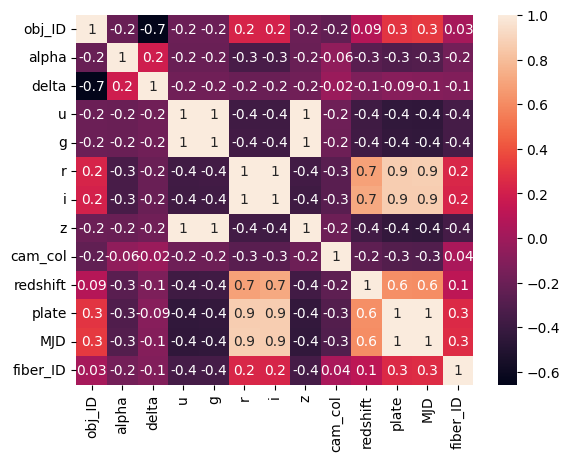

In [31]:
x_star_matrix = x_star_scaller_pd.corr()
sns.heatmap(x_star_matrix.corr(), annot = True, fmt='.1g')

In [32]:
for i in range(len(x_star_matrix)):
    x_star_matrix.iloc[i, i] = 0

# Задаем значение порога для фильтрации
threshold = 0.50

# Фильтруем корреляционную матрицу по порогу
filtered_corr_matrix = x_star_matrix.abs() > threshold

# Суммируем значения по каждому признаку для определения важности признаков
feature_star_importance = filtered_corr_matrix.sum()

# Сортируем признаки по убыванию и получаем список наиболее важных признаков
important_star_features = feature_star_importance.sort_values(ascending=False)

print("Наиболее важные признаки:\n", important_star_features)

Наиболее важные признаки:
 r           3
i           3
plate       3
MJD         3
u           2
g           2
z           2
obj_ID      0
alpha       0
delta       0
cam_col     0
redshift    0
fiber_ID    0
dtype: int64


### 3.10 Многоклассовая классификация с отфильтрованными признаками


In [33]:
# Выбираем наиболее важные признаки на основе порогового значения
selected_features_star = ['r','i','plate','MJD','u','g','z']

# Отфильтровываем данные по выбранным признакам
x_train_star_filtered = x_star_train[selected_features_star]
x_test_star_filtered = x_star_test[selected_features_star]

# Обучаем модель с отфильтрованными признаками
star_filtered = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
star_filtered.fit(x_train_star_filtered, y_star_train)
predict_star_filtered = star_filtered.predict(x_test_star_filtered)

### 3.11 Метрики после классификации 

In [34]:
model_star_filtered_acc = accuracy_score(y_star_test,predict_star_filtered)
model_star_filtered_prec = precision_score(y_star_test, predict_star_filtered, average = "micro")
model_star_filtered_rec = recall_score(y_star_test, predict_star_filtered, average = "micro")
model_star_filtered_f1 = f1_score(y_star_test, predict_star_filtered, average = "micro")
model_star_filtered_report = classification_report(y_star_test, predict_star_filtered)

print(f"Accuracy = {model_star_filtered_acc}; Precision = {model_star_filtered_prec}; Recall = {model_star_filtered_rec}; F1-score = {model_star_filtered_f1}")
print(f"Classification Report: \n {model_star_filtered_report}")

Accuracy = 0.836525; Precision = 0.836525; Recall = 0.836525; F1-score = 0.836525
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     23733
           1       0.72      0.74      0.73      7626
           2       0.78      0.63      0.69      8641

    accuracy                           0.84     40000
   macro avg       0.80      0.77      0.78     40000
weighted avg       0.83      0.84      0.83     40000



### 3.12 Сравнить результаты "до" и "после" фильтрации, сделать выводы

#### Некоторые метрики снизились, но совсем не много, при этом использовались половина признаков. Такое уменьшение количества признаков 
#### сыграло ключевую роль в производительности, при этом качество особо не ухудшилось

### 3.13 Перебор гиперпараметров k в определенном диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. 
#### Построить график train/test accuracy в зависимости от значения 

In [35]:
train_star_score = []
test_star_score = []
crossval_star_score = []

for k in range(1, 30):
    model_stars = KNeighborsClassifier(n_neighbors=k)
    scores_stars = cross_val_score(model_stars, x_star_scaller_pd, y1, cv = 9)
    print(f"Neighbors: {k}, folds count: 10 avg score: {scores_stars.mean()}")
    crossval_star_score.append(scores_stars.mean())
    model_stars.fit(x_train_star_filtered, y_star_train)
    pred_star_train = model_stars.predict(x_train_star_filtered)
    pred_star_test = model_stars.predict(x_test_star_filtered)
    train_star_score.append(accuracy_score(y_star_train, pred_star_train))
    test_star_score.append(accuracy_score(y_star_test, pred_star_test))

Neighbors: 1, folds count: 10 avg score: 0.8825600585019528
Neighbors: 2, folds count: 10 avg score: 0.8740600130983311
Neighbors: 3, folds count: 10 avg score: 0.8943700272135912
Neighbors: 4, folds count: 10 avg score: 0.8851199905087603
Neighbors: 5, folds count: 10 avg score: 0.894449999215615
Neighbors: 6, folds count: 10 avg score: 0.8868699954098173
Neighbors: 7, folds count: 10 avg score: 0.8930099956147148
Neighbors: 8, folds count: 10 avg score: 0.8869299834107052
Neighbors: 9, folds count: 10 avg score: 0.8914699865141199
Neighbors: 10, folds count: 10 avg score: 0.8859499781102922
Neighbors: 11, folds count: 10 avg score: 0.8893299831126461
Neighbors: 12, folds count: 10 avg score: 0.8844299872084393
Neighbors: 13, folds count: 10 avg score: 0.8873599904105594
Neighbors: 14, folds count: 10 avg score: 0.8833399961069445
Neighbors: 15, folds count: 10 avg score: 0.8856099945088725
Neighbors: 16, folds count: 10 avg score: 0.8820699915062505
Neighbors: 17, folds count: 10 avg

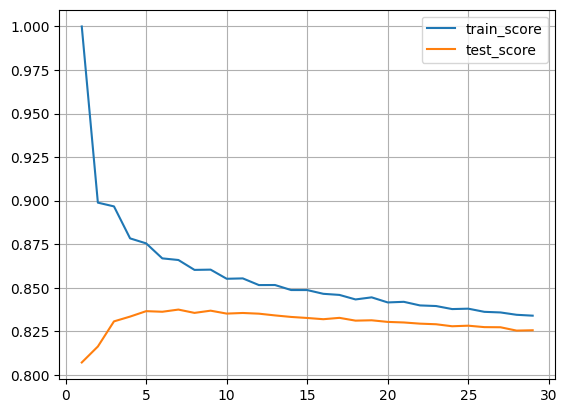

In [36]:
plt.plot(range(1, 30), train_star_score, label = 'train_score')
plt.plot(range(1, 30), test_star_score, label = 'test_score')
plt.legend()
plt.grid()

### 3.14 Для лучшего классификатора привести метрики, classification_report, построить confusion matrix
#### Лучший результат классификатор достигает при K = 3 

In [37]:
model_finish = KNeighborsClassifier(n_neighbors=3)
model_finish.fit(x_train_star_filtered, y_star_train)
pred_finish = model_finish.predict(x_test_star_filtered)

In [38]:
model_star_finish_acc = accuracy_score(y_star_test,pred_finish)
model_star_finish_prec = precision_score(y_star_test, pred_finish, average = "micro")
model_star_finish_rec = recall_score(y_star_test, pred_finish, average = "micro")
model_star_finish_f1 = f1_score(y_star_test, pred_finish, average = "micro")
model_star_finish_report = classification_report(y_star_test, pred_finish)

print(f"Accuracy = {model_star_finish_acc}; Precision = {model_star_finish_prec}; Recall = {model_star_finish_rec}; F1-score = {model_star_finish_f1}")
print(f"Classification Report: \n {model_star_finish_report}")

Accuracy = 0.83065; Precision = 0.83065; Recall = 0.83065; F1-score = 0.83065
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     23733
           1       0.73      0.71      0.72      7626
           2       0.75      0.64      0.69      8641

    accuracy                           0.83     40000
   macro avg       0.79      0.76      0.77     40000
weighted avg       0.83      0.83      0.83     40000



<Axes: >

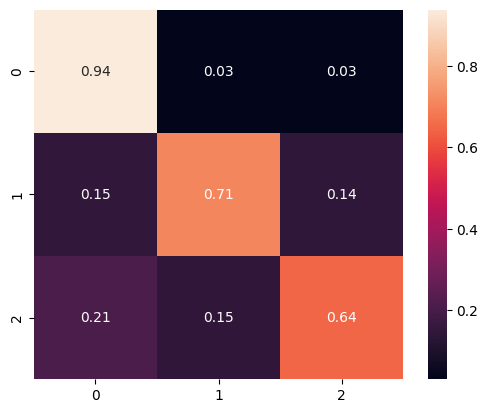

In [39]:
sns.heatmap(data=confusion_matrix(y_star_test, pred_finish, normalize='true'), square=True, annot=True, fmt='.2f')